In [1]:
from sklearn import datasets
import pandas as pd
from matplotlib import cm
%matplotlib inline

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df ['target_name'] = df.target.apply(lambda x: iris.target_names[x])
df.columns = [i.replace(" (cm)","").replace(" ","_") for i in  df.columns]

In [55]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, stratify=df.target_name, test_size=0.4)

In [56]:
X_train, y_train = df_train.iloc[:,:4], df_train.target
X_test, y_test = df_test.iloc[:,:4], df_test.target

In [57]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [58]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, gridplot
from bokeh.models import ColumnDataSource, Legend
from bokeh.transform import factor_cmap, factor_mark
output_notebook()

Loading BokehJS ...

In [60]:
ds = ColumnDataSource(df_train)
mark_size = 10
p1 = figure(title=None, width=300, height=300)
p1.xaxis.axis_label, p1.yaxis.axis_label = 'Sepal Length', 'Sepal Width'
p1.scatter('sepal_length', 'sepal_width', source=ds, size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p2 = figure(title=None, width=300, height=300)
p2.xaxis.axis_label, p2.yaxis.axis_label = 'Petal Length', 'Sepal Width'
p2.scatter('petal_length', 'sepal_width', source=ds, size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p3 = figure(title=None, width=300, height=300)
p3.xaxis.axis_label, p1.yaxis.axis_label = 'Sepal Length', 'Petal Width'
p3.scatter('sepal_length', 'petal_width', source=ds, legend='target_name', size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p3.legend.location = 'bottom_right'
p4 = figure(title=None, width=300, height=300)
p4.xaxis.axis_label, p2.yaxis.axis_label = 'Petal Length', 'Petal Width'
p4.scatter('petal_length', 'petal_width', source=ds, size=mark_size, alpha=0.5,
          color=factor_cmap('target_name', 'Category10_3', df_train.target_name.unique()))
p = gridplot([[p1,p2], [p3,p4]])
show(p)

## Decision Tree

In [61]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


[Text(83.7, 199.32, 'X[3] <= 0.8\nentropy = 0.667\nsamples = 90\nvalue = [30, 30, 30]'),
 Text(41.85, 163.07999999999998, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(125.55000000000001, 163.07999999999998, 'X[3] <= 1.65\nentropy = 0.5\nsamples = 60\nvalue = [0, 30, 30]'),
 Text(83.7, 126.83999999999999, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 1.75\nentropy = 0.117\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(83.7, 90.6, 'X[0] <= 5.8\nentropy = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(41.85, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(125.55000000000001, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 90.6, 'X[2] <= 4.85\nentropy = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(209.25, 54.359999999999985, 'X[1] <= 3.1\nentropy = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(167.4, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue =

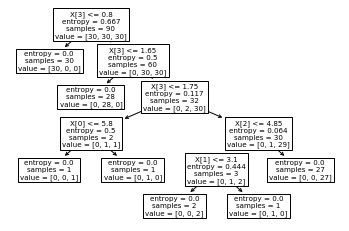

In [62]:
ax = tree.plot_tree(clf);
ax

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
accuracy_score(y_test, y_hat)

0.9333333333333333

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_test, y_hat)

C:\Users\cmsi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9666666666666667